<a href="https://colab.research.google.com/github/vitorscience/Data-Science/blob/main/Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**


---

Neste projeto, o objetivo é criar um modelo de Machine Learning para previsão de custos de seguros de vida. Trata-se de um modelo de regressão que utiliza técnicas de Auto Machine Learning para análise e construção da modelagem dos dados, utilizando este conjunto de dados do Kaggle.

In [ ]:
# instalando a biblioteca
!pip install pycaret -q
!pip install mlflow -q
!pip install scipy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.5 MB/s eta 0:00:00
   ━━━

In [ ]:
pip install pycaret==2.3.10 -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 32.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
pip install pandas-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.5 MB/s eta 0:00:00


In [ ]:
#importando as bibiotecas nescesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import pycaret
from pycaret.regression import *
from sklearn.model_selection import train_test_split


In [ ]:
!pip install ydata-profiling -q


In [ ]:
from ydata_profiling import ProfileReport


Para que esse processo seja feito de maneira automatizada e eficiente, serão usadas duas bibliotecas. A primeira biblioteca é a ydata_profiling; com ela, é possível realizar a criação de análises explanatórias e extrair insights. A segunda biblioteca é o pycaret; com ela, o processo de pipeline e modelagem fica mais simples, sendo possível gerar diversos modelos e fazer comparações entre eles.

In [8]:
#Importando os dados
df = pd.read_csv('insurance.csv')

In [47]:
print(f'Total de linhas da base:{df.shape[0]}')
print(f'Total de colunas da base:{df.shape[1]}')

Total de linhas da base:1338
Total de colunas da base:7


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Lista de Variáveis



*  age (idade): Idade da pessoa segurada. Trata-se de uma variável numérica que indica a idade em anos completos.

*  sex (sexo): Sexo da pessoa segurada. É uma variável categórica que indica se o indivíduo é do sexo masculino (male) ou feminino (female).

*  bmi (Índice de Massa Corporal - IMC): Variável numérica que representa o IMC da pessoa segurada. O IMC é calculado a partir do peso e da altura, sendo uma métrica usada para classificar se o indivíduo está abaixo do peso, com peso normal, sobrepeso ou obeso.

*  children (número de filhos): Quantidade de filhos ou dependentes cobertos pelo seguro. Trata-se de uma variável numérica discreta que indica o número de filhos.

*  smoker (fumante): Variável categórica que indica se a pessoa segurada é fumante (yes) ou não (no).

*  region (região): Variável categórica que indica a região dos Estados Unidos onde o segurado reside. As categorias incluem:

northeast (nordeste)
northwest (noroeste)
southeast (sudeste)
southwest (sudoeste)
*  charges (custos): Variável numérica que indica o valor cobrado pelo seguro de saúde. Esta é a variável alvo (dependente) usada em modelos preditivos para estimar os custos de seguro com base nas outras variáveis.



In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Análise Explanatória

O processo de análise exploratória é crucial para entender a base de dados. Com o uso do Pandas Profiling, é possível otimizar essa etapa de maneira prática e eficiente.

In [10]:
profile = ProfileReport(df)

In [44]:
profile

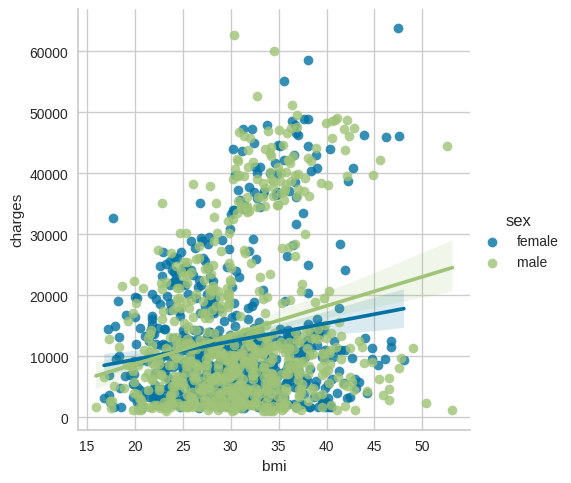

In [12]:
sns.lmplot(x='bmi', y='charges',hue='sex', data=df)

Através do gráfico, é possível observar que as variáveis relacionadas ao gênero estão bem balanceadas, indicando uma distribuição equilibrada entre as categorias masculinas e femininas. Essa característica é importante para garantir que a análise ou o modelo de machine learning não seja enviesado em relação ao gênero, promovendo resultados mais confiáveis e justos.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [17]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
# criando o setup do PyCaret
reg = setup(data=train, target='charges')

,Description,Value
0,Session id,4752
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [22]:
# criando o pipeline
reg = setup(data = train,
            target = 'charges',
            normalize = True,
            log_experiment = False,
            experiment_name = 'sales_01')

,Description,Value
0,Session id,3368
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [23]:
# best = compare_models()
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2496.4699,20848714.7417,4502.5673,0.8517,0.3964,0.2654,0.1820
lightgbm,Light Gradient Boosting Machine,2722.8801,21971836.4902,4628.7506,0.8436,0.4829,0.3028,1.0860
rf,Random Forest Regressor,2680.4909,23528236.0864,4807.0621,0.8324,0.4198,0.2770,0.5600
et,Extra Trees Regressor,2571.1960,24323234.0700,4892.1690,0.8263,0.4343,0.2748,0.3850
ada,AdaBoost Regressor,3926.8885,25753233.7956,5055.1342,0.8157,0.5529,0.5943,0.1070
xgboost,Extreme Gradient Boosting,2993.2912,26438291.5000,5091.2008,0.8116,0.4937,0.3463,0.2290
knn,K Neighbors Regressor,3362.2096,30485388.0000,5493.7960,0.7850,0.4604,0.3518,0.1050
lr,Linear Regression,4069.8896,36107685.8732,5991.7225,0.7442,0.5932,0.4203,0.6820
llar,Lasso Least Angle Regression,4068.7754,36175843.2497,5996.4000,0.7437,0.5859,0.4207,0.1310
br,Bayesian Ridge,4072.9315,36175625.1246,5996.1602,0.7437,0.6100,0.4215,0.0930


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Com base nas principais métricas de erro, o Gradient Boosting Regressor apresentou o melhor desempenho em comparação com os demais modelos. Além disso, esse modelo destacou-se por apresentar um TT  significativamente melhor, com um valor de 0,1820.

In [24]:
print(best)

GradientBoostingRegressor(random_state=3368)


In [25]:
#Verificando os modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [26]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2627.7684,19695804.4930,4437.9955,0.8544,0.3776,0.2657
1,2693.9300,27363159.6521,5230.9808,0.8096,0.3913,0.2404
2,2768.6931,25216253.1828,5021.5788,0.7432,0.4943,0.2897
3,2737.1731,25267033.6637,5026.6324,0.8435,0.3891,0.2454
4,2128.9882,17612867.5627,4196.7687,0.8628,0.3453,0.2319
5,2981.6879,31532799.3949,5615.4073,0.8100,0.4484,0.2795
6,2023.0282,10806138.3378,3287.2691,0.9132,0.3049,0.2350
7,2745.7555,25027855.4599,5002.7848,0.8562,0.4951,0.2813
8,2176.7332,13050209.6876,3612.5074,0.9224,0.3527,0.2736


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
tuned_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2735.3818,19400410.3779,4404.5897,0.8566,0.4098,0.3026
1,3036.7366,33106953.6146,5753.8642,0.7696,0.4300,0.2562
2,2948.0955,24906714.3680,4990.6627,0.7464,0.5701,0.4130
3,2509.2830,22648047.2320,4758.9965,0.8597,0.3789,0.2161
4,2331.7244,17205978.7597,4148.0090,0.8659,0.3587,0.2735
5,3162.6054,31637031.7761,5624.6806,0.8094,0.4358,0.2627
6,2201.2065,11172886.7040,3342.5868,0.9103,0.3203,0.2595
7,2865.8512,26801139.8738,5176.9817,0.8460,0.4792,0.2407
8,2498.3878,15177052.9088,3895.7737,0.9098,0.3376,0.2778


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
# veriificando os parâmetros
print(tuned_gbr)

GradientBoostingRegressor(random_state=3368)


In [29]:
# veriificando os parâmetros
print(tuned_gbr)

GradientBoostingRegressor(random_state=3368)


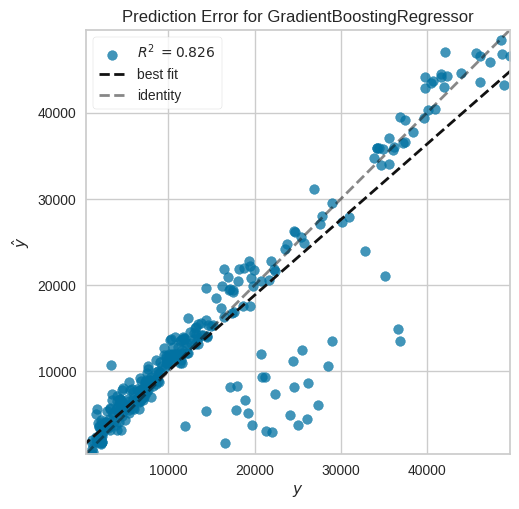

In [30]:
# plotando matriz de confusão
plot_model(tuned_gbr, plot='error')

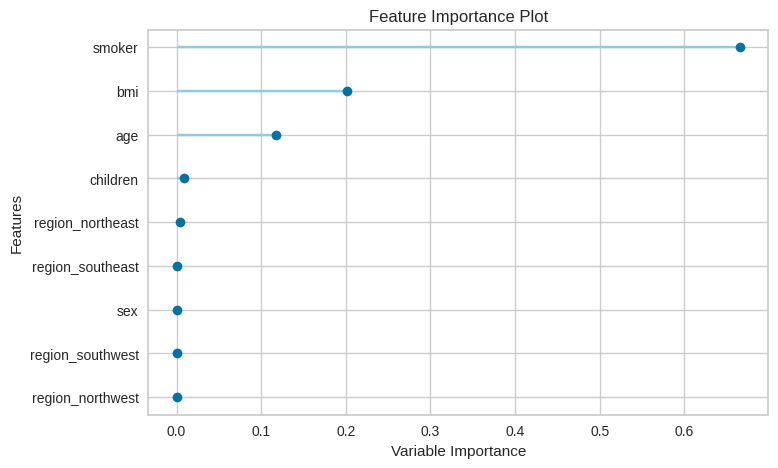

In [31]:
# feature importances
plot_model(tuned_gbr, plot='feature')

A variável com maior impacto no modelo é smoker, indicando que ela desempenha um papel crucial na explicação das variáveis de saída.

In [32]:
# avaliando o modelo
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
# fazendo previsões
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2579.7483,24886323.5481,4988.6194,0.8263,0.4470,0.2443


In [34]:
# finalizando o modelo
final_gbr = finalize_model(tuned_gbr)

In [35]:
type(final_gbr)

pycaret.internal.pipeline.Pipeline

In [36]:
# analisando a mudança nos resultados
pred_holdout = predict_model(final_gbr, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2160.3077,15343550.8533,3917.0845,0.8953,0.3507,0.2527


In [37]:
# verificando os parâmetros
print(final_gbr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                      

In [38]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2413.3081,18822276.8078,4338.4648,0.8788,0.3939,0.2859


,age,sex,bmi,children,smoker,region,charges,prediction_label
764,45,female,25.174999,2,no,northeast,9095.068359,10925.482144
887,36,female,30.020000,0,no,northwest,5272.175781,5706.412302
890,64,female,26.885000,0,yes,northwest,29330.982422,28037.933733
1293,46,male,25.745001,3,no,northwest,9301.893555,9626.887547
259,19,male,31.920000,0,yes,northwest,33750.292969,33868.648842


In [39]:
# salvando o modelo
save_model(final_gbr,'Modelo_Final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
    

In [40]:
saved_final_gbr = load_model('Modelo_Final')

Transformation Pipeline and Model Successfully Loaded


In [41]:
# fazendo previsões com o modelo salvo
new_prediction = predict_model(saved_final_gbr, data=test)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2413.3081,18822276.8078,4338.4648,0.8788,0.3939,0.2859


,age,sex,bmi,children,smoker,region,charges,prediction_label
764,45,female,25.174999,2,no,northeast,9095.068359,10925.482144
887,36,female,30.020000,0,no,northwest,5272.175781,5706.412302
890,64,female,26.885000,0,yes,northwest,29330.982422,28037.933733
1293,46,male,25.745001,3,no,northwest,9301.893555,9626.887547
259,19,male,31.920000,0,yes,northwest,33750.292969,33868.648842


In [42]:
new_prediction

,age,sex,bmi,children,smoker,region,charges,prediction_label
764,45,female,25.174999,2,no,northeast,9095.068359,10925.482144
887,36,female,30.020000,0,no,northwest,5272.175781,5706.412302
890,64,female,26.885000,0,yes,northwest,29330.982422,28037.933733
1293,46,male,25.745001,3,no,northwest,9301.893555,9626.887547
259,19,male,31.920000,0,yes,northwest,33750.292969,33868.648842
...,...,...,...,...,...,...,...,...
109,63,male,35.090000,0,yes,southeast,47055.531250,45165.986501
575,58,female,27.170000,0,no,northwest,12222.898438,12539.626228
535,38,male,28.025000,1,no,northeast,6067.126953,6794.252419
543,54,female,47.410000,0,yes,southeast,63770.429688,47986.067993


# Conclusão
O PyCaret se destaca como uma ferramenta poderosa para agilizar o processo de modelagem e experimentação em projetos de ciência de dados. Com ele, foi possível testar rapidamente diversos algoritmos, ajustar hiperparâmetros de forma automática e selecionar o modelo de melhor desempenho com base em métricas específicas.

Ao avaliar o modelo selecionado em dados que não haviam sido vistos anteriormente, observou-se que ele manteve um desempenho consistente, o que demonstra sua robustez. Na primeira avaliação, utilizando dados do conjunto de treinamento e validação, a média do
$𝑅^2$ foi de 0,8953. Quando aplicado a novos dados, o modelo apresentou uma leve queda, atingindo um
𝑅^2$ de 0,8788.

Além disso, o PyCaret facilitou o salvamento do modelo treinado, permitindo sua reutilização em diferentes contextos sem a necessidade de retrainamento, o que economiza tempo e recursos. A comparação entre os diferentes modelos testados revelou que o algoritmo escolhido não apenas superou os outros em termos de desempenho, mas também se mostrou estável em dados fora da amostra.

Esses resultados reforçam como o uso do PyCaret pode acelerar o ciclo de desenvolvimento de projetos, reduzindo o esforço manual e oferecendo soluções rápidas e eficazes.

